### Clustering

In [157]:
! pip install pyclustering
! pip install scikit-learn-extra

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [158]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import plotly.express as px


In [159]:
data = pd.read_excel("covid_and_coordinates.xlsx")

In [160]:
data

,Country,Country_code,WHO Region,Cases - cumulative total,Cases - cumulative total per 100000 population,Deaths - cumulative total,Deaths - cumulative total per 100000 population,Latitude,Longitude
0,"occupied Palestinian territory, including east...",PS,Eastern Mediterranean,703228,13785,5708,112,31.952162,35.233154
1,Sweden,SE,Europe,2751035,26638,27219,264,60.128161,18.643501
2,Kosovo,XK,Europe,274279,15274,3212,179,42.602636,20.902977
3,Iraq,IQ,Eastern Mediterranean,2465545,6130,25375,63,33.223191,43.679291
4,Russian Federation,RU,Europe,23983621,16435,402232,276,61.524010,105.318756
...,...,...,...,...,...,...,...,...,...
215,North Macedonia,MK,Europe,350555,16826,9975,479,41.608635,21.745275
216,Somalia,SO,Eastern Mediterranean,27334,172,1361,9,5.152149,46.199616
217,Slovakia,SK,Europe,1877558,34401,21224,389,48.669026,19.699024
218,Ireland,IE,Europe,1734506,34939,9539,192,53.412910,-8.243890


#### k-means

In [161]:
from sklearn.preprocessing import StandardScaler

relevant_columns = ['Cases - cumulative total', 'Cases - cumulative total per 100000 population',  'Deaths - cumulative total', 'Deaths - cumulative total per 100000 population', 'Latitude', 'Longitude']
X = data[relevant_columns]

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

silhouette_scores = []
num_clusters_list = range(2, 7)

for k in num_clusters_list:
    kmeans = KMeans(n_clusters=k, random_state=42)
    
    kmeans.fit(X_scaled)
    
    labels = kmeans.labels_
    
    silhouette_avg = silhouette_score(X_scaled, labels)
    silhouette_scores.append(silhouette_avg)

optimal_num_clusters = num_clusters_list[np.argmax(silhouette_scores)]
optimal_silhouette_score = max(silhouette_scores)

print("Optimal Number of Clusters:", optimal_num_clusters)
print("Optimal Silhouette Score:", optimal_silhouette_score)



Optimal Number of Clusters: 2
Optimal Silhouette Score: 0.3309686110003133


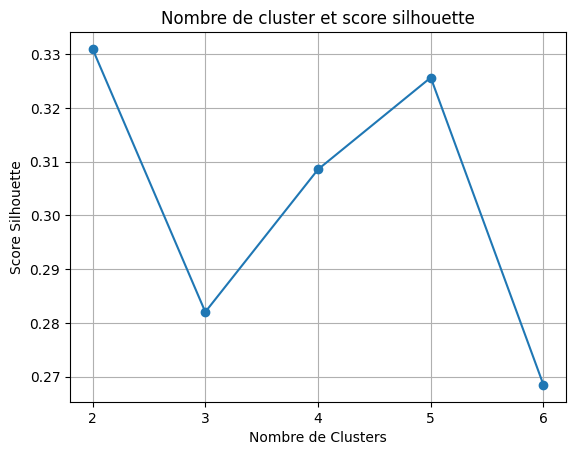

In [162]:
plt.plot(num_clusters_list, silhouette_scores, marker='o')
plt.xlabel('Nombre de Clusters')
plt.ylabel('Score Silhouette')
plt.title('Nombre de cluster et score silhouette')
plt.xticks(num_clusters_list)
plt.grid(True)
plt.show()

In [163]:
kmeans = KMeans(n_clusters=optimal_num_clusters, random_state=42)

kmeans.fit(X_scaled)

cluster_labels = kmeans.labels_

k_means_clusters = pd.DataFrame({'Country': data['Country'], 'Cluster': cluster_labels})

In [164]:
fig1 = px.choropleth(k_means_clusters, 
                     locations='Country', 
                     locationmode='country names',
                     color='Cluster',
                     hover_name='Country',
                     hover_data=['Cluster'],
                     title='Clustering avec k-means',
                     color_discrete_sequence=px.colors.qualitative.Pastel) 
fig1.update_coloraxes(colorbar_title="Clusters")
fig1.show()


#### K-menoids

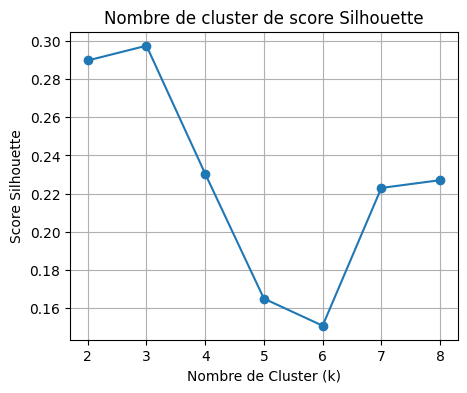

Best number of clusters found: 3


In [165]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import silhouette_score
import plotly.express as px


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

best_score = -1
best_k = -1
best_clusters = None
silhouette_scores = []

for k in range(2, 9):
    kmedoids = KMedoids(n_clusters=k, random_state=0)
    clusters = kmedoids.fit_predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, clusters)
    silhouette_scores.append(silhouette_avg)
    
    if silhouette_avg > best_score:
        best_score = silhouette_avg
        best_k = k
        best_clusters = clusters

plt.figure(figsize=(5, 4))
plt.plot(range(2, 9), silhouette_scores, marker='o', linestyle='-')
plt.title('Nombre de cluster de score Silhouette')
plt.xlabel('Nombre de Cluster (k)')
plt.ylabel('Score Silhouette')
plt.xticks(range(2, 9))
plt.grid(True)
plt.show()

print(f"Best number of clusters found: {best_k}")




In [166]:

df_medoids = data.copy()
df_medoids['Cluster'] = best_clusters


fig = px.choropleth(df_medoids, 
                    locations='Country', 
                    locationmode='country names',
                    color='Cluster',
                    hover_name='Country',
                    hover_data=['Cluster'],
                    title='KMedoids Clustering', 
                    color_discrete_sequence=px.colors.qualitative.Pastel)
fig.update_coloraxes(colorbar_title="Clusters")
fig.show()

#### Agglomerative hierarchical clustering

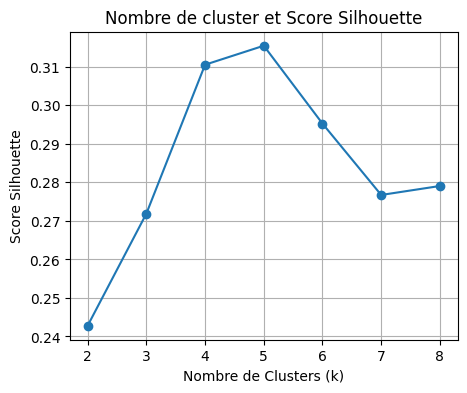

Best number of clusters found: 5


In [167]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import plotly.express as px


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

best_score = -1
best_k = -1
best_clusters = None
silhouette_scores = []

for k in range(2, 9):
    agg_clustering = AgglomerativeClustering(n_clusters=k)
    clusters = agg_clustering.fit_predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, clusters)
    silhouette_scores.append(silhouette_avg)

plt.figure(figsize=(5, 4))
plt.plot(range(2, 9), silhouette_scores, marker='o', linestyle='-')
plt.title('Nombre de cluster et Score Silhouette')
plt.xlabel('Nombre de Clusters (k)')
plt.ylabel('Score Silhouette')
plt.xticks(range(2, 9))
plt.grid(True)
plt.show()

best_k = np.argmax(silhouette_scores) + 2 

print(f"Best number of clusters found: {best_k}")

agg_clustering = AgglomerativeClustering(n_clusters=best_k)
best_clusters = agg_clustering.fit_predict(X_scaled)

df_agg = data.copy()
df_agg['Cluster'] = best_clusters

fig = px.choropleth(df_agg, 
                    locations='Country', 
                    locationmode='country names',
                    color='Cluster',
                    hover_name='Country',
                    hover_data=['Cluster'],
                    title='Agglomerative Hierarchical Clustering', 
                    color_continuous_scale='Viridis')
fig.update_coloraxes(colorbar_title="Clusters")
fig.show()


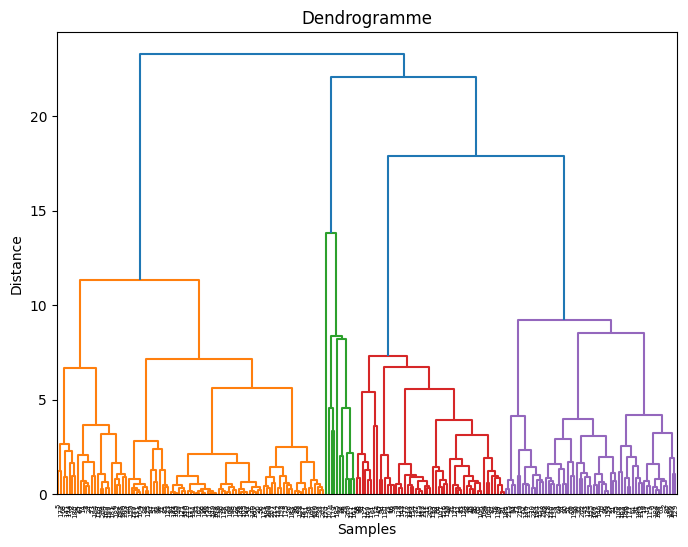

In [168]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

agg_clustering = AgglomerativeClustering(n_clusters=best_k)
best_clusters = agg_clustering.fit_predict(X_scaled)

Z = linkage(X_scaled, 'ward')

plt.figure(figsize=(8, 6))
dendrogram(Z)
plt.title('Dendrogramme')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()
